In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int
    sr : float # strike rate
    bpb : float # balls per boundary
    bp : float # boundary percent
    summary : str 

In [8]:
def cal_sr(state: BatsmanState) -> BatsmanState:
    sr = (state['runs']/state['balls']) * 100
    state['sr'] = sr
    return {'sr' : sr}

def cal_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    state[bpb] = bpb
    return {'bpb' : bpb}

def cal_bp(state: BatsmanState) -> BatsmanState:
    bp = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs']) * 100
    state['bp'] = bp
    return {'bp' : bp}

def cal_summary(state: BatsmanState) -> BatsmanState:
    summary = f'Strike rate is {state['sr']}\n Balls per boundary is {state['bpb']}\n and boundary percent is {state['bp']}'
    return {'summary' : summary}
    

In [12]:
graph = StateGraph(BatsmanState)
graph.add_node('cal_sr', cal_sr)
graph.add_node('cal_bpb', cal_bpb)
graph.add_node('cal_bp', cal_bp)
graph.add_node('cal_summary', cal_summary)


In [14]:
graph.add_edge(START, 'cal_sr')
graph.add_edge(START, 'cal_bpb')
graph.add_edge(START, 'cal_bp')

graph.add_edge('cal_sr', 'cal_summary')
graph.add_edge('cal_bpb', 'cal_summary')
graph.add_edge('cal_bp', 'cal_summary')

graph.add_edge('cal_summary', END)
wf = graph.compile()

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [17]:
initial_state = {
    'runs' : 100,
    'balls' : 50,
    'fours' : 6,
    'sixes' : 4

}

wf.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'bp': 48.0,
 'summary': 'Strike rate is 200.0\n Balls per boundary is 5.0\n and boundary percent is 48.0'}

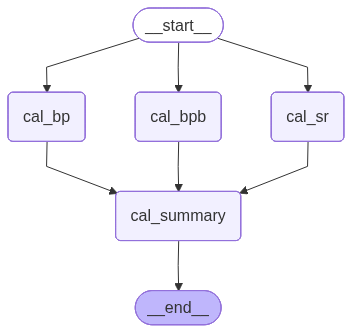

In [18]:
from IPython.display import Image
Image(wf.get_graph().draw_mermaid_png())